Use the follwing setting in the generator.py under preprocessing. Basically instead of telling it to not resize, we tell it to resize, but with the sizes that match the input images instead of the default 800x1333

        no_resize=False,
        image_min_side=4384,
        image_max_side=6576,

## Step 1: Install the keras-retinanet repo

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
cd gdrive/MyDrive/project_6/keras-retinanet/

/content/gdrive/MyDrive/project_6/keras-retinanet


In [ ]:
#install the keras-retinanet repo
!pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/gdrive/MyDrive/project_6/keras-retinanet
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=169542 sha256=429d7f523fcc953118bb5382c122373d70a1e04541c34a6408a3dab30db621e0
  Stored in directory: /root/.cache/pip/wheels/7d/ad/3f/c8e123f71b0a3aac845e62ff32b995338ef40a3bf56d1123fd
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=98993154cd9489af8c0eda20082ec8d28d9312fb3d3b16f5788a102b

In [ ]:
!python setup.py build_ext --inplace

running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-3.7/keras_retinanet/utils/compute_overlap.cpython-37m-x86_64-linux-gnu.so -> keras_retinanet/utils


## Step 2: Import all required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

import urllib
from keras_retinanet.utils.visualization import draw_box, draw_boxes, draw_caption, label_color
from keras_retinanet.utils.image import preprocess_image, resize_image

## Step 3. Download pre-trained model

In [ ]:
pwd

'/content/gdrive/MyDrive/project_6/keras-retinanet'

In [ ]:
if not os.path.exists("snapshots"):
  os.mkdir("snapshots")

In [ ]:
url_model = "https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5"
pretrained_model = "/content/gdrive/MyDrive/project_6/keras-retinanet/snapshots/resnet50_csv.h5"
urllib.request.urlretrieve(url_model, pretrained_model)

('/content/gdrive/MyDrive/project_6/keras-retinanet/snapshots/resnet50_csv.h5',
 <http.client.HTTPMessage at 0x7fd0bc7c8210>)

## Step 4. Tune the Pre-trained Model

In [ ]:
cd /content/gdrive/MyDrive/project_6/keras-retinanet

/content/gdrive/MyDrive/project_6/keras-retinanet


In [ ]:
#runtime was disconnected in the middle of epoch 21
#probably hit the 12 hours limit

pretrained_model = "/content/gdrive/MyDrive/project_6/keras-retinanet/snapshots/resnet50_csv.h5"

!keras_retinanet/bin/train.py --config /content/gdrive/MyDrive/project_6/keras-retinanet/keras_retinanet/config/config.ini \
    --freeze-backbone \
    --weights {pretrained_model} \
    --batch-size 8 \
    --steps 125 \
    --epochs 30 \
    csv /content/gdrive/MyDrive/project_6/csv_files/train_data.csv /content/gdrive/MyDrive/project_6/csv_files/classes.csv

In [ ]:
#resume from epoch 20

pretrained_model = "/content/gdrive/MyDrive/project_6/keras-retinanet/snapshots/resnet50_csv_20.h5"

!keras_retinanet/bin/train.py --config /content/gdrive/MyDrive/project_6/keras-retinanet/keras_retinanet/config/config.ini \
    --freeze-backbone \
    --weights {pretrained_model} \
    --batch-size 8 \
    --steps 125 \
    --epochs 30 \
    --initial-epoch 20 \
    csv /content/gdrive/MyDrive/project_6/csv_files/train_data.csv /content/gdrive/MyDrive/project_6/csv_files/classes.csv

In [ ]:
#resume from epoch 30
#change the epochs to 100
#epochs is the end epoch, not the total number of epochs

pretrained_model = "/content/gdrive/MyDrive/project_6/keras-retinanet/snapshots/resnet50_csv_30.h5"

!keras_retinanet/bin/train.py --config /content/gdrive/MyDrive/project_6/keras-retinanet/keras_retinanet/config/config.ini \
    --freeze-backbone \
    --weights {pretrained_model} \
    --batch-size 8 \
    --steps 125 \
    --epochs 100 \
    --initial-epoch 30 \
    csv /content/gdrive/MyDrive/project_6/csv_files/train_data.csv /content/gdrive/MyDrive/project_6/csv_files/classes.csv

In [ ]:
#resume from epoch 50

pretrained_model = "/content/gdrive/MyDrive/project_6/keras-retinanet/snapshots/resnet50_csv_50.h5"

!keras_retinanet/bin/train.py --config /content/gdrive/MyDrive/project_6/keras-retinanet/keras_retinanet/config/config.ini \
    --freeze-backbone \
    --weights {pretrained_model} \
    --batch-size 8 \
    --steps 125 \
    --epochs 100 \
    --initial-epoch 50 \
    csv /content/gdrive/MyDrive/project_6/csv_files/train_data.csv /content/gdrive/MyDrive/project_6/csv_files/classes.csv

In [ ]:
#summary of all the 68 epochs
#the train script automatically changes to learning rate (lr) when it sees a plateau
#it changes by lowering the lr by a factor of 10 every time

lr05 = """
125/125 [==============================] - 1962s 16s/step - loss: 4.8645 - regression_loss: 1.9130 - classification_loss: 2.9516 - lr: 1.0000e-05
125/125 [==============================] - 1880s 15s/step - loss: 2.7428 - regression_loss: 1.6648 - classification_loss: 1.0780 - lr: 1.0000e-05
125/125 [==============================] - 1871s 15s/step - loss: 2.5430 - regression_loss: 1.5921 - classification_loss: 0.9509 - lr: 1.0000e-05
125/125 [==============================] - 1867s 15s/step - loss: 2.4466 - regression_loss: 1.5493 - classification_loss: 0.8972 - lr: 1.0000e-05
125/125 [==============================] - 2521s 20s/step - loss: 2.3638 - regression_loss: 1.5184 - classification_loss: 0.8453 - lr: 1.0000e-05
125/125 [==============================] - 2071s 16s/step - loss: 2.2720 - regression_loss: 1.4485 - classification_loss: 0.8236 - lr: 1.0000e-05
125/125 [==============================] - 1777s 14s/step - loss: 2.1753 - regression_loss: 1.3875 - classification_loss: 0.7878 - lr: 1.0000e-05
125/125 [==============================] - 1764s 14s/step - loss: 2.1295 - regression_loss: 1.3378 - classification_loss: 0.7917 - lr: 1.0000e-05
125/125 [==============================] - 1765s 14s/step - loss: 2.0105 - regression_loss: 1.2589 - classification_loss: 0.7516 - lr: 1.0000e-05
125/125 [==============================] - 1778s 14s/step - loss: 1.8966 - regression_loss: 1.1840 - classification_loss: 0.7127 - lr: 1.0000e-05
125/125 [==============================] - 1782s 14s/step - loss: 1.8111 - regression_loss: 1.1152 - classification_loss: 0.6959 - lr: 1.0000e-05
125/125 [==============================] - 1766s 14s/step - loss: 1.7615 - regression_loss: 1.0892 - classification_loss: 0.6722 - lr: 1.0000e-05
125/125 [==============================] - 2053s 16s/step - loss: 1.6773 - regression_loss: 1.0145 - classification_loss: 0.6628 - lr: 1.0000e-05
125/125 [==============================] - 2426s 19s/step - loss: 1.6129 - regression_loss: 0.9685 - classification_loss: 0.6443 - lr: 1.0000e-05
125/125 [==============================] - 2451s 20s/step - loss: 1.5803 - regression_loss: 0.9261 - classification_loss: 0.6542 - lr: 1.0000e-05
125/125 [==============================] - 2439s 19s/step - loss: 1.4595 - regression_loss: 0.8628 - classification_loss: 0.5967 - lr: 1.0000e-05
125/125 [==============================] - 2450s 20s/step - loss: 1.4347 - regression_loss: 0.8497 - classification_loss: 0.5850 - lr: 1.0000e-05
125/125 [==============================] - 2466s 20s/step - loss: 1.3908 - regression_loss: 0.8174 - classification_loss: 0.5734 - lr: 1.0000e-05
125/125 [==============================] - 2445s 20s/step - loss: 1.3325 - regression_loss: 0.7688 - classification_loss: 0.5637 - lr: 1.0000e-05
125/125 [==============================] - 2400s 19s/step - loss: 1.2576 - regression_loss: 0.7272 - classification_loss: 0.5304 - lr: 1.0000e-05
125/125 [==============================] - 2128s 17s/step - loss: 1.2192 - regression_loss: 0.7081 - classification_loss: 0.5111 - lr: 1.0000e-05
125/125 [==============================] - 1881s 15s/step - loss: 1.1947 - regression_loss: 0.6897 - classification_loss: 0.5050 - lr: 1.0000e-05
125/125 [==============================] - 1863s 15s/step - loss: 1.1382 - regression_loss: 0.6399 - classification_loss: 0.4982 - lr: 1.0000e-05
125/125 [==============================] - 1879s 15s/step - loss: 1.1116 - regression_loss: 0.6269 - classification_loss: 0.4846 - lr: 1.0000e-05
125/125 [==============================] - 1921s 15s/step - loss: 1.0772 - regression_loss: 0.5895 - classification_loss: 0.4877 - lr: 1.0000e-05
125/125 [==============================] - 1927s 15s/step - loss: 1.0439 - regression_loss: 0.5625 - classification_loss: 0.4815 - lr: 1.0000e-05
125/125 [==============================] - 1874s 15s/step - loss: 1.0089 - regression_loss: 0.5294 - classification_loss: 0.4796 - lr: 1.0000e-05
125/125 [==============================] - 1874s 15s/step - loss: 0.9449 - regression_loss: 0.5130 - classification_loss: 0.4320 - lr: 1.0000e-05
125/125 [==============================] - 1891s 15s/step - loss: 0.9417 - regression_loss: 0.5175 - classification_loss: 0.4242 - lr: 1.0000e-05
125/125 [==============================] - 1892s 15s/step - loss: 0.9004 - regression_loss: 0.4899 - classification_loss: 0.4105 - lr: 1.0000e-05
125/125 [==============================] - 1967s 16s/step - loss: 0.8825 - regression_loss: 0.4812 - classification_loss: 0.4013 - lr: 1.0000e-05
125/125 [==============================] - 1779s 14s/step - loss: 0.8083 - regression_loss: 0.4262 - classification_loss: 0.3821 - lr: 1.0000e-05
125/125 [==============================] - 1809s 14s/step - loss: 0.8061 - regression_loss: 0.4256 - classification_loss: 0.3805 - lr: 1.0000e-05
125/125 [==============================] - 1790s 14s/step - loss: 0.8128 - regression_loss: 0.4309 - classification_loss: 0.3818 - lr: 1.0000e-05
125/125 [==============================] - 1834s 15s/step - loss: 0.7836 - regression_loss: 0.3963 - classification_loss: 0.3873 - lr: 1.0000e-05
125/125 [==============================] - 2392s 19s/step - loss: 0.7384 - regression_loss: 0.3824 - classification_loss: 0.3560 - lr: 1.0000e-05
125/125 [==============================] - 2392s 19s/step - loss: 0.7144 - regression_loss: 0.3741 - classification_loss: 0.3403 - lr: 1.0000e-05
125/125 [==============================] - 2405s 19s/step - loss: 0.7153 - regression_loss: 0.3651 - classification_loss: 0.3501 - lr: 1.0000e-05
125/125 [==============================] - 2414s 19s/step - loss: 0.7121 - regression_loss: 0.3680 - classification_loss: 0.3441 - lr: 1.0000e-05
125/125 [==============================] - 2409s 19s/step - loss: 0.7020 - regression_loss: 0.3596 - classification_loss: 0.3424 - lr: 1.0000e-05
125/125 [==============================] - 2404s 19s/step - loss: 0.6505 - regression_loss: 0.3450 - classification_loss: 0.3054 - lr: 1.0000e-05
125/125 [==============================] - 2400s 19s/step - loss: 0.6560 - regression_loss: 0.3347 - classification_loss: 0.3213 - lr: 1.0000e-05
125/125 [==============================] - 2089s 17s/step - loss: 0.6330 - regression_loss: 0.3153 - classification_loss: 0.3177 - lr: 1.0000e-05
125/125 [==============================] - 1913s 15s/step - loss: 0.6155 - regression_loss: 0.3056 - classification_loss: 0.3099 - lr: 1.0000e-05
125/125 [==============================] - 1925s 15s/step - loss: 0.6007 - regression_loss: 0.3018 - classification_loss: 0.2989 - lr: 1.0000e-05
125/125 [==============================] - 1922s 15s/step - loss: 0.5942 - regression_loss: 0.2875 - classification_loss: 0.3067 - lr: 1.0000e-05
125/125 [==============================] - 1919s 15s/step - loss: 0.5563 - regression_loss: 0.2821 - classification_loss: 0.2741 - lr: 1.0000e-05
125/125 [==============================] - 1925s 15s/step - loss: 0.5882 - regression_loss: 0.2781 - classification_loss: 0.3100 - lr: 1.0000e-05
125/125 [==============================] - 1921s 15s/step - loss: 0.5497 - regression_loss: 0.2664 - classification_loss: 0.2833 - lr: 1.0000e-05
125/125 [==============================] - 1920s 15s/step - loss: 0.4909 - regression_loss: 0.2462 - classification_loss: 0.2447 - lr: 1.0000e-05
125/125 [==============================] - 2109s 17s/step - loss: 0.4808 - regression_loss: 0.2341 - classification_loss: 0.2467 - lr: 1.0000e-05
125/125 [==============================] - 2461s 20s/step - loss: 0.4702 - regression_loss: 0.2289 - classification_loss: 0.2413 - lr: 1.0000e-05
125/125 [==============================] - 2455s 20s/step - loss: 0.4697 - regression_loss: 0.2294 - classification_loss: 0.2403 - lr: 1.0000e-05
125/125 [==============================] - 2442s 19s/step - loss: 0.4723 - regression_loss: 0.2249 - classification_loss: 0.2474 - lr: 1.0000e-05
125/125 [==============================] - 2432s 19s/step - loss: 0.4848 - regression_loss: 0.2227 - classification_loss: 0.2621 - lr: 1.0000e-05"""

lr06 = """
125/125 [==============================] - 2419s 19s/step - loss: 0.3817 - regression_loss: 0.1845 - classification_loss: 0.1971 - lr: 1.0000e-06
125/125 [==============================] - 2420s 19s/step - loss: 0.3761 - regression_loss: 0.1774 - classification_loss: 0.1987 - lr: 1.0000e-06
125/125 [==============================] - 2423s 19s/step - loss: 0.3673 - regression_loss: 0.1723 - classification_loss: 0.1950 - lr: 1.0000e-06
125/125 [==============================] - 2068s 16s/step - loss: 0.3456 - regression_loss: 0.1603 - classification_loss: 0.1853 - lr: 1.0000e-06
125/125 [==============================] - 1962s 16s/step - loss: 0.3530 - regression_loss: 0.1644 - classification_loss: 0.1886 - lr: 1.0000e-06
125/125 [==============================] - 1967s 16s/step - loss: 0.3468 - regression_loss: 0.1534 - classification_loss: 0.1934 - lr: 1.0000e-06"""

lr07 = """
125/125 [==============================] - 1981s 16s/step - loss: 0.3332 - regression_loss: 0.1404 - classification_loss: 0.1929 - lr: 1.0000e-07
125/125 [==============================] - 1980s 16s/step - loss: 0.3383 - regression_loss: 0.1505 - classification_loss: 0.1878 - lr: 1.0000e-07
125/125 [==============================] - 2115s 17s/step - loss: 0.3440 - regression_loss: 0.1544 - classification_loss: 0.1897 - lr: 1.0000e-07"""

lr08 = """
125/125 [==============================] - 2439s 19s/step - loss: 0.3487 - regression_loss: 0.1577 - classification_loss: 0.1910 - lr: 1.0000e-08
125/125 [==============================] - 2439s 19s/step - loss: 0.3359 - regression_loss: 0.1518 - classification_loss: 0.1841 - lr: 1.0000e-08"""

lr09 = """
125/125 [==============================] - 2435s 19s/step - loss: 0.3360 - regression_loss: 0.1499 - classification_loss: 0.1861 - lr: 1.0000e-09
125/125 [==============================] - 2435s 19s/step - loss: 0.3330 - regression_loss: 0.1479 - classification_loss: 0.1851 - lr: 1.0000e-09"""

## Step 5. Plot the losses vs. epoch

In [ ]:
epoch_list = (lr05.split(" - lr: 1.0000e-05")[:-1] 
              + lr06.split(" - lr: 1.0000e-06")[:-1] 
              + lr07.split(" - lr: 1.0000e-07")[:-1] 
              + lr08.split(" - lr: 1.0000e-08")[:-1]
              + lr09.split(" - lr: 1.0000e-09")[:-1])

In [ ]:
total_time = [int(epoch[44:48]) for epoch in epoch_list] #the last one is an empty string
total_loss = [float(epoch[67:73]) for epoch in epoch_list] #the last one is an empty string
reg_loss = [float(epoch[93:99]) for epoch in epoch_list] #the last one is an empty string
clf_loss = [float(epoch[123:]) for epoch in epoch_list] #the last one is an empty string
epoch = list(range(1, len(total_time)+1))

train_summary = {"epoch": epoch,
                 "time": total_time,
                 "total_loss": total_loss,
                 "reg_loss": reg_loss,
                 "clf_loss": clf_loss}
train_summary = pd.DataFrame(data=train_summary)
train_summary.tail(10)

,epoch,time,total_loss,reg_loss,clf_loss
58,59,2068,0.3456,0.1603,0.1853
59,60,1962,0.3530,0.1644,0.1886
60,61,1967,0.3468,0.1534,0.1934
61,62,1981,0.3332,0.1404,0.1929
62,63,1980,0.3383,0.1505,0.1878
63,64,2115,0.3440,0.1544,0.1897
64,65,2439,0.3487,0.1577,0.1910
65,66,2439,0.3359,0.1518,0.1841
66,67,2435,0.3360,0.1499,0.1861
67,68,2435,0.3330,0.1479,0.1851


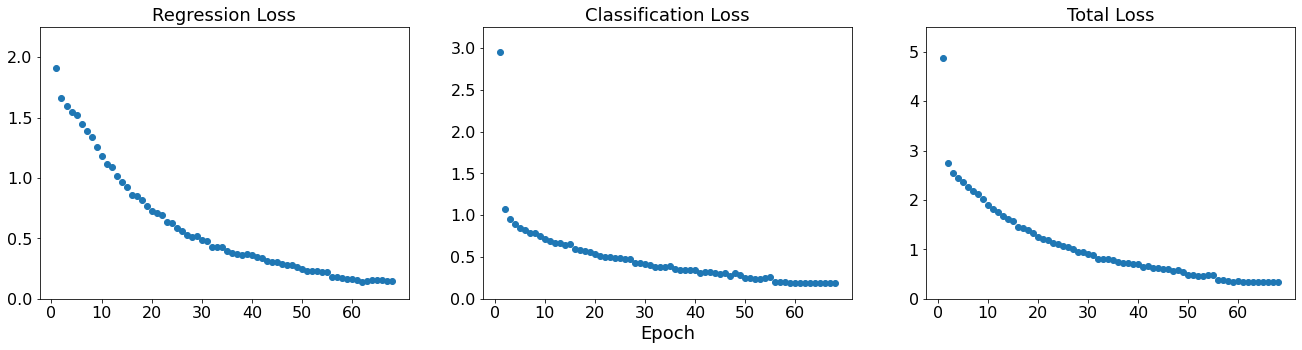

In [ ]:
#plot the losses
plt.figure(figsize = (22.5,5))

plt.subplot(1,3,1)
plt.scatter(train_summary["epoch"], train_summary["reg_loss"])
plt.title("Regression Loss", fontsize=18)
plt.ylim(0,2.25)
plt.xticks(ticks=list(range(0,65,10)),
           labels=[str(i) for i in range(0,65,10)],
           fontsize=16)
plt.yticks(ticks=np.arange(0,2.5,0.5),
           labels=[str(i) for i in np.arange(0,2.5,0.5)],
           fontsize=16)

plt.subplot(1,3,2)
plt.scatter(train_summary["epoch"], train_summary["clf_loss"])
plt.title("Classification Loss", fontsize=18)
plt.ylim(0,3.25)
plt.xlabel("Epoch", fontsize=18)
plt.xticks(ticks=list(range(0,65,10)),
           labels=[str(i) for i in range(0,65,10)],
           fontsize=16)
plt.yticks(ticks=np.arange(0,3.5,0.5),
           labels=[str(i) for i in np.arange(0,3.5,0.5)],
           fontsize=16)

plt.subplot(1,3,3)
plt.scatter(train_summary["epoch"], train_summary["total_loss"])
plt.title("Total Loss", fontsize=18)
plt.ylim(0,5.5)
plt.xticks(ticks=list(range(0,65,10)),
           labels=[str(i) for i in range(0,65,10)],
           fontsize=16)
plt.yticks(ticks=list(range(0,6,1)),
           labels=[str(i) for i in list(range(0,6,1))],
           fontsize=16);

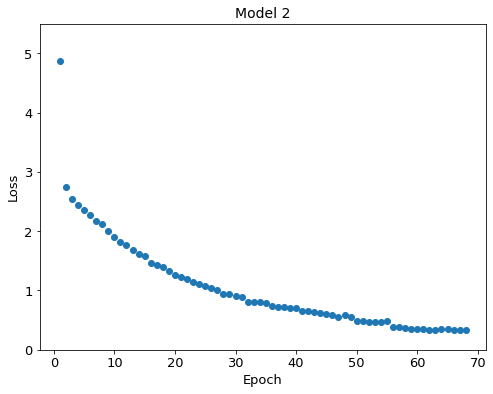

In [ ]:
#plot the total loss only
plt.figure(figsize=(8,6))
plt.scatter(train_summary["epoch"], train_summary["total_loss"])
plt.title("Model 2", fontsize=14)
plt.xlabel("Epoch", fontsize=13)
plt.ylabel("Loss", fontsize=13)
plt.ylim(0,5.5)
plt.xticks(ticks=list(range(0,75,10)),
           labels=[str(i) for i in range(0,75,10)],
           fontsize=13)
plt.yticks(ticks=list(range(0,6,1)),
           labels=[str(i) for i in list(range(0,6,1))],
           fontsize=13)
plt.savefig("/content/gdrive/MyDrive/project_6/output/training_model_2.png", dpi=300, transparent=True, bbox_inches="tight");